In [1]:
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from functions.load_datasets import load_and_merge_from_config
from functions.calculate_monthly_returns import calculate_monthly_returns

In [2]:
base = str(Path().resolve().parent) + "/data/"

pbr_config = {
    "df_pbr_20": ("pbr_2020.xls", 1),
    "df_pbr_21": ("pbr_2021.xls", 1),
    "df_pbr_22": ("pbr_2022.xls", 1),
    "df_pbr_23": ("pbr_2023.xls", 1),
    "df_pbr_24": ("pbr_2024.xls", 1),
    "df_pbr_25": ("pbr_2025.xls", 1),
}

stp_config = {
    "df_stp_20": ("stp_2020.xls", 1),
    "df_stp_21": ("stp_2021.xls", 1),
    "df_stp_22": ("stp_2022.xls", 1),
    "df_stp_23": ("stp_2023.xls", 1),
    "df_stp_24": ("stp_2024.xls", 1),
    "df_stp_25": ("stp_2025.xls", 1),
}

df_pbr = load_and_merge_from_config(base, pbr_config)
df_stp = load_and_merge_from_config(base, stp_config)

df_returns = calculate_monthly_returns(df_stp)

In [3]:
# データ構造の確認
print("df_pbrの形状:", df_pbr.shape)
print("\ndf_pbrのカラム名:")
print(df_pbr.columns.tolist())
print("\ndf_pbrの最初の数行:")
df_pbr.head()

df_pbrの形状: (3474, 73)

df_pbrのカラム名:
['Company', '2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06', '2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12', '2021/01', '2021/02', '2021/03', '2021/04', '2021/05', '2021/06', '2021/07', '2021/08', '2021/09', '2021/10', '2021/11', '2021/12', '2022/01', '2022/02', '2022/03', '2022/04', '2022/05', '2022/06', '2022/07', '2022/08', '2022/09', '2022/10', '2022/11', '2022/12', '2023/01', '2023/02', '2023/03', '2023/04', '2023/05', '2023/06', '2023/07', '2023/08', '2023/09', '2023/10', '2023/11', '2023/12', '2024/01', '2024/02', '2024/03', '2024/04', '2024/05', '2024/06', '2024/07', '2024/08', '2024/09', '2024/10', '2024/11', '2024/12', '2025/01', '2025/02', '2025/03', '2025/04', '2025/05', '2025/06', '2025/07', '2025/08', '2025/09', '2025/10', '2025/11', '2025/12']

df_pbrの最初の数行:


,Company,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,...,2025/03,2025/04,2025/05,2025/06,2025/07,2025/08,2025/09,2025/10,2025/11,2025/12
0,あい ホールディングス,2.2368,1.7446,1.5249,1.5318,1.6520,1.7778,1.6005,2.0292,2.2111,...,1.1067,1.1269,1.2310,1.2540,1.2947,1.3323,1.4475,1.3845,1.4169,1.4413
1,あおぞら銀行,0.7223,0.6589,0.5028,0.4714,0.5545,0.5196,0.4279,0.4832,0.4421,...,0.6449,0.6156,0.6497,0.6702,0.6874,0.6976,0.7049,0.6716,0.7271,0.7554
2,あかつき本社,0.9728,0.8228,0.7322,0.6954,0.7066,0.6684,0.6532,0.7471,0.7525,...,1.0117,0.9815,0.9448,0.9600,1.0115,1.0672,1.0481,1.0232,1.0271,1.0707
3,あさくま,2.2664,2.1353,1.9538,1.8828,2.0097,1.9716,1.9469,2.2212,2.2451,...,7.0426,7.1215,7.4109,7.4399,7.3122,7.1590,7.1693,7.2788,7.6748,7.9750
4,あさひ,1.2066,0.9894,1.0279,1.2032,1.4412,1.3145,1.4257,1.6119,1.5210,...,0.9777,0.9291,0.9116,0.8570,0.8692,0.8866,0.8953,0.8340,0.8417,0.8378


In [4]:
# df_stpの構造確認（株価データの可能性）
print("df_stpの形状:", df_stp.shape)
print("\ndf_stpのカラム名:")
print(df_stp.columns.tolist())
print("\ndf_stpの最初の数行:")
df_stp.head()

df_stpの形状: (3474, 73)

df_stpのカラム名:
['Company', '2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06', '2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12', '2021/01', '2021/02', '2021/03', '2021/04', '2021/05', '2021/06', '2021/07', '2021/08', '2021/09', '2021/10', '2021/11', '2021/12', '2022/01', '2022/02', '2022/03', '2022/04', '2022/05', '2022/06', '2022/07', '2022/08', '2022/09', '2022/10', '2022/11', '2022/12', '2023/01', '2023/02', '2023/03', '2023/04', '2023/05', '2023/06', '2023/07', '2023/08', '2023/09', '2023/10', '2023/11', '2023/12', '2024/01', '2024/02', '2024/03', '2024/04', '2024/05', '2024/06', '2024/07', '2024/08', '2024/09', '2024/10', '2024/11', '2024/12', '2025/01', '2025/02', '2025/03', '2025/04', '2025/05', '2025/06', '2025/07', '2025/08', '2025/09', '2025/10', '2025/11', '2025/12']

df_stpの最初の数行:


,Company,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,...,2025/03,2025/04,2025/05,2025/06,2025/07,2025/08,2025/09,2025/10,2025/11,2025/12
0,あい ホールディングス,1884.0,1525.0,1333.0,1339.0,1444.0,1554.0,1399.0,1774.0,1933.0,...,2075.0,2113.0,2302.0,2345.0,2421.0,2579.0,2802.0,2680.0,2780.0,2828.0
1,あおぞら銀行,2962.0,2702.0,2062.0,1933.0,2002.0,1876.0,1687.0,1905.0,1743.0,...,2058.5,1965.0,2096.0,2162.0,2217.5,2291.0,2315.0,2205.5,2415.0,2509.0
2,あかつき本社,364.0,303.0,268.0,251.0,278.0,263.0,257.0,279.0,281.0,...,502.0,487.0,496.0,504.0,531.0,558.0,548.0,535.0,566.0,590.0
3,あさくま,1730.0,1600.0,1464.0,1407.0,1465.0,1437.0,1419.0,1486.0,1502.0,...,4015.0,4060.0,4225.0,4370.0,4295.0,4205.0,4255.0,4320.0,4555.0,4865.0
4,あさひ,1317.0,1080.0,1122.0,1294.0,1550.0,1490.0,1616.0,1827.0,1847.0,...,1469.0,1385.0,1359.0,1329.0,1348.0,1375.0,1403.0,1307.0,1319.0,1305.0


In [5]:
# データの基本統計と欠損値の確認
print("=" * 60)
print("PBRデータの基本情報")
print("=" * 60)
print(f"企業数: {len(df_pbr)}")
print(f"\n欠損値の割合 (全体): {df_pbr.isnull().sum().sum() / df_pbr.size * 100:.2f}%")

# 各列の欠損値を確認
missing_by_col = df_pbr.isnull().sum()
missing_by_col = missing_by_col[missing_by_col > 0].sort_values(ascending=False)
if len(missing_by_col) > 0:
    print("\n主な欠損値のある列（上位10）:")
    print(missing_by_col.head(10))

print("\n" + "=" * 60)
print("株価データの基本情報")
print("=" * 60)
print(f"企業数: {len(df_stp)}")
print(f"\n欠損値の割合 (全体): {df_stp.isnull().sum().sum() / df_stp.size * 100:.2f}%")

PBRデータの基本情報
企業数: 3474

欠損値の割合 (全体): 2.73%

主な欠損値のある列（上位10）:
2020/01    172
2020/02    167
2020/03    148
2020/04    146
2020/05    138
2020/06    138
2020/07    133
2020/08    129
2020/09    126
2020/10    116
dtype: int64

株価データの基本情報
企業数: 3474

欠損値の割合 (全体): 0.95%


In [ ]:
# PBRによる5分位ポートフォリオ構築と月次リターン計算
def create_quintile_portfolios(df_pbr, df_returns, n_quintiles=5):
    """
    PBRで5分位ポートフォリオを構築し、各分位の月次リターンを計算

    Parameters:
    -----------
    df_pbr : DataFrame
        PBRデータ（時系列順）
    df_returns : DataFrame
        月次リターンデータ
    n_quintiles : int
        分位数（デフォルト: 5）

    Returns:
    --------
    DataFrame
        各分位の月次平均リターン
    """
    # PBRの日付列を取得
    pbr_cols = [col for col in df_pbr.columns if col != 'Company']

    # リターン列を取得（ret_で始まる列）
    return_cols = [col for col in df_returns.columns if col.startswith('ret_')]

    # 結果を格納する辞書
    portfolio_returns = {f'Q{i+1}': [] for i in range(n_quintiles)}
    portfolio_returns['Date'] = []

    # 各月について処理
    for i in range(len(pbr_cols) - 1):
        formation_month = pbr_cols[i]  # ポートフォリオ形成月のPBR
        return_month = return_cols[i]  # 翌月のリターン

        # 形成月の日付を取得
        portfolio_returns['Date'].append(return_month.replace('ret_', ''))

        # PBRとリターンをマージ
        temp_df = pd.DataFrame({
            'Company': df_pbr['Company'],
            'PBR': df_pbr[formation_month],
            'Return': df_returns[return_month]
        })

        # 欠損値を除外
        temp_df = temp_df.dropna()

        if len(temp_df) < n_quintiles:
            # データが不十分な場合はNaNを追加
            for q in range(n_quintiles):
                portfolio_returns[f'Q{q+1}'].append(np.nan)
            continue

        # PBRで5分位に分割（Q1が最も低いPBR = バリュー株）
        temp_df['Quintile'] = pd.qcut(temp_df['PBR'], q=n_quintiles, labels=False, duplicates='drop')

        # 各分位の等加重平均リターンを計算
        for q in range(n_quintiles):
            quintile_returns = temp_df[temp_df['Quintile'] == q]['Return']
            avg_return = quintile_returns.mean() if len(quintile_returns) > 0 else np.nan
            portfolio_returns[f'Q{q+1}'].append(avg_return)

    # DataFrameに変換
    result_df = pd.DataFrame(portfolio_returns)
    result_df = result_df.set_index('Date')

    return result_df

# 5分位ポートフォリオを構築（ソート済みデータを使用）
quintile_returns = create_quintile_portfolios(df_pbr, df_returns, n_quintiles=5)

print("5分位ポートフォリオの月次リターン")
print("=" * 60)
print(f"データ期間: {quintile_returns.index[0]} ～ {quintile_returns.index[-1]}")
print(f"観測数: {len(quintile_returns)}")
print(f"\n最初の10行:")
print(quintile_returns.head(10))
print(f"\n最後の5行:")
print(quintile_returns.tail(5))

5分位ポートフォリオの月次リターン
データ期間: 2020/02 ～ 2025/12
観測数: 71

最初の10行:
                Q1         Q2         Q3         Q4         Q5
Date                                                          
2020/02 -12.983340 -13.619971 -14.457858 -16.563131 -18.083532
2020/03  -9.045491  -6.993532  -8.084390  -9.042748 -10.354993
2020/04   5.289686   6.108352   6.932019  10.542521  15.581082
2020/05   6.552315   8.204652   8.688957  11.710877  16.078743
2020/06  -0.209384   0.086076   0.143422   0.989297   3.876247
2020/07  -5.783094  -5.528557  -5.473836  -5.874637  -6.128070
2020/08   7.039707   7.016507   9.140417  10.054217  12.438635
2020/09   4.326687   4.163941   5.345397   6.114304   6.687099
2020/10  -3.254904  -3.515260  -3.826442  -4.758611  -6.158846
2020/11   5.217415   4.269362   5.531632   5.437800   5.444582

最後の5行:
               Q1        Q2        Q3        Q4        Q5
Date                                                     
2025/08  6.433985  5.481659  7.079505  4.714117  4.830424
20

In [10]:
# 基本統計量の計算
print("\n" + "=" * 80)
print("各分位の基本統計量（月次リターン、%）")
print("=" * 80)

stats_summary = pd.DataFrame({
    '平均': quintile_returns.mean(),
    '中央値': quintile_returns.median(),
    '標準偏差': quintile_returns.std(),
    '最小値': quintile_returns.min(),
    '最大値': quintile_returns.max(),
    '観測数': quintile_returns.count()
})

# 年率換算リターン（月次リターン × 12）
stats_summary['年率平均'] = stats_summary['平均'] * 12

print(stats_summary.round(3))

# バリュープレミアムの計算（Q1 - Q5）
value_premium = quintile_returns['Q1'] - quintile_returns['Q5']
value_premium.name = 'Value Premium (Q1-Q5)'

print("\n" + "=" * 80)
print("バリュープレミアム（Q1 - Q5）の統計量")
print("=" * 80)
print(f"平均: {value_premium.mean():.4f}%")
print(f"年率平均: {value_premium.mean() * 12:.4f}%")
print(f"標準偏差: {value_premium.std():.4f}%")
print(f"t値: {value_premium.mean() / (value_premium.std() / np.sqrt(len(value_premium))):.4f}")
print(f"観測数: {value_premium.count()}")


各分位の基本統計量（月次リターン、%）
       平均    中央値   標準偏差     最小値     最大値  観測数    年率平均
Q1  1.221  1.828  3.599 -12.983   7.040   71  14.649
Q2  1.098  1.419  3.515 -13.620   8.205   71  13.171
Q3  0.976  1.169  3.771 -14.458   9.140   71  11.714
Q4  0.667  0.876  4.273 -16.563  11.711   71   8.004
Q5  0.428  0.642  5.516 -18.084  16.079   71   5.141

バリュープレミアム（Q1 - Q5）の統計量
平均: 0.7924%
年率平均: 9.5088%
標準偏差: 3.7643%
t値: 1.7737
観測数: 71


In [ ]:
# 統計的検定（t検定）の実施
print("\n" + "=" * 80)
print("統計的検定結果（t検定）")
print("=" * 80)

# 各分位のリターンがゼロと異なるかを検定
print("\n【各分位の平均リターンの有意性検定】")
print("H0: 平均リターン = 0")
print("-" * 80)

test_results = []
for col in quintile_returns.columns:
    data = quintile_returns[col].dropna()
    t_stat, p_value = stats.ttest_1samp(data, 0)

    # 有意性の判定
    if p_value < 0.01:
        sig = '***'
    elif p_value < 0.05:
        sig = '**'
    elif p_value < 0.1:
        sig = '*'
    else:
        sig = ''

    test_results.append({
        '分位': col,
        '平均リターン (%)': data.mean(),
        't値': t_stat,
        'p値': p_value,
        '有意性': sig
    })

results_df = pd.DataFrame(test_results)
print(results_df.to_string(index=False))
print("\n注: *** p<0.01, ** p<0.05, * p<0.1")

# バリュープレミアム（Q1 - Q5）の検定
print("\n" + "=" * 80)
print("【バリュープレミアム（Q1 - Q5）の有意性検定】")
print("H0: バリュープレミアム = 0")
print("-" * 80)

vp_data = value_premium.dropna()
vp_t_stat, vp_p_value = stats.ttest_1samp(vp_data, 0)

if vp_p_value < 0.01:
    vp_sig = '***'
elif vp_p_value < 0.05:
    vp_sig = '**'
elif vp_p_value < 0.1:
    vp_sig = '*'
else:
    vp_sig = ''

print(f"平均バリュープレミアム: {vp_data.mean():.4f}% {vp_sig}")
print(f"年率平均: {vp_data.mean() * 12:.4f}%")
print(f"標準偏差: {vp_data.std():.4f}%")
print(f"t値: {vp_t_stat:.4f}")
print(f"p値: {vp_p_value:.6f}")
print(f"観測数: {len(vp_data)}")
print(f"\n結論: ", end="")
if vp_p_value < 0.05:
    print(f"バリュープレミアムは統計的に有意（p={vp_p_value:.4f}）")
    print("→ 日本市場でバリュー効果が確認されました")
else:
    print(f"バリュープレミアムは統計的に有意ではない（p={vp_p_value:.4f}）")
    print("→ 日本市場でバリュー効果は確認されませんでした")


統計的検定結果（t検定）

【各分位の平均リターンの有意性検定】
H0: 平均リターン = 0
--------------------------------------------------------------------------------
分位  平均リターン (%)       t値       p値 有意性
Q1    1.220780 2.858187 0.005608 ***
Q2    1.097599 2.631198 0.010458  **
Q3    0.976198 2.181477 0.032509  **
Q4    0.666960 1.315307 0.192699    
Q5    0.428379 0.654403 0.514996    

注: *** p<0.01, ** p<0.05, * p<0.1

【バリュープレミアム（Q1 - Q5）の有意性検定】
H0: バリュープレミアム = 0
--------------------------------------------------------------------------------
平均バリュープレミアム: 0.7924% *
年率平均: 9.5088%
標準偏差: 3.7643%
t値: 1.7737
p値: 0.080456
観測数: 71

結論: バリュープレミアムは統計的に有意ではない（p=0.0805）
→ 日本市場でバリュー効果は確認されませんでした


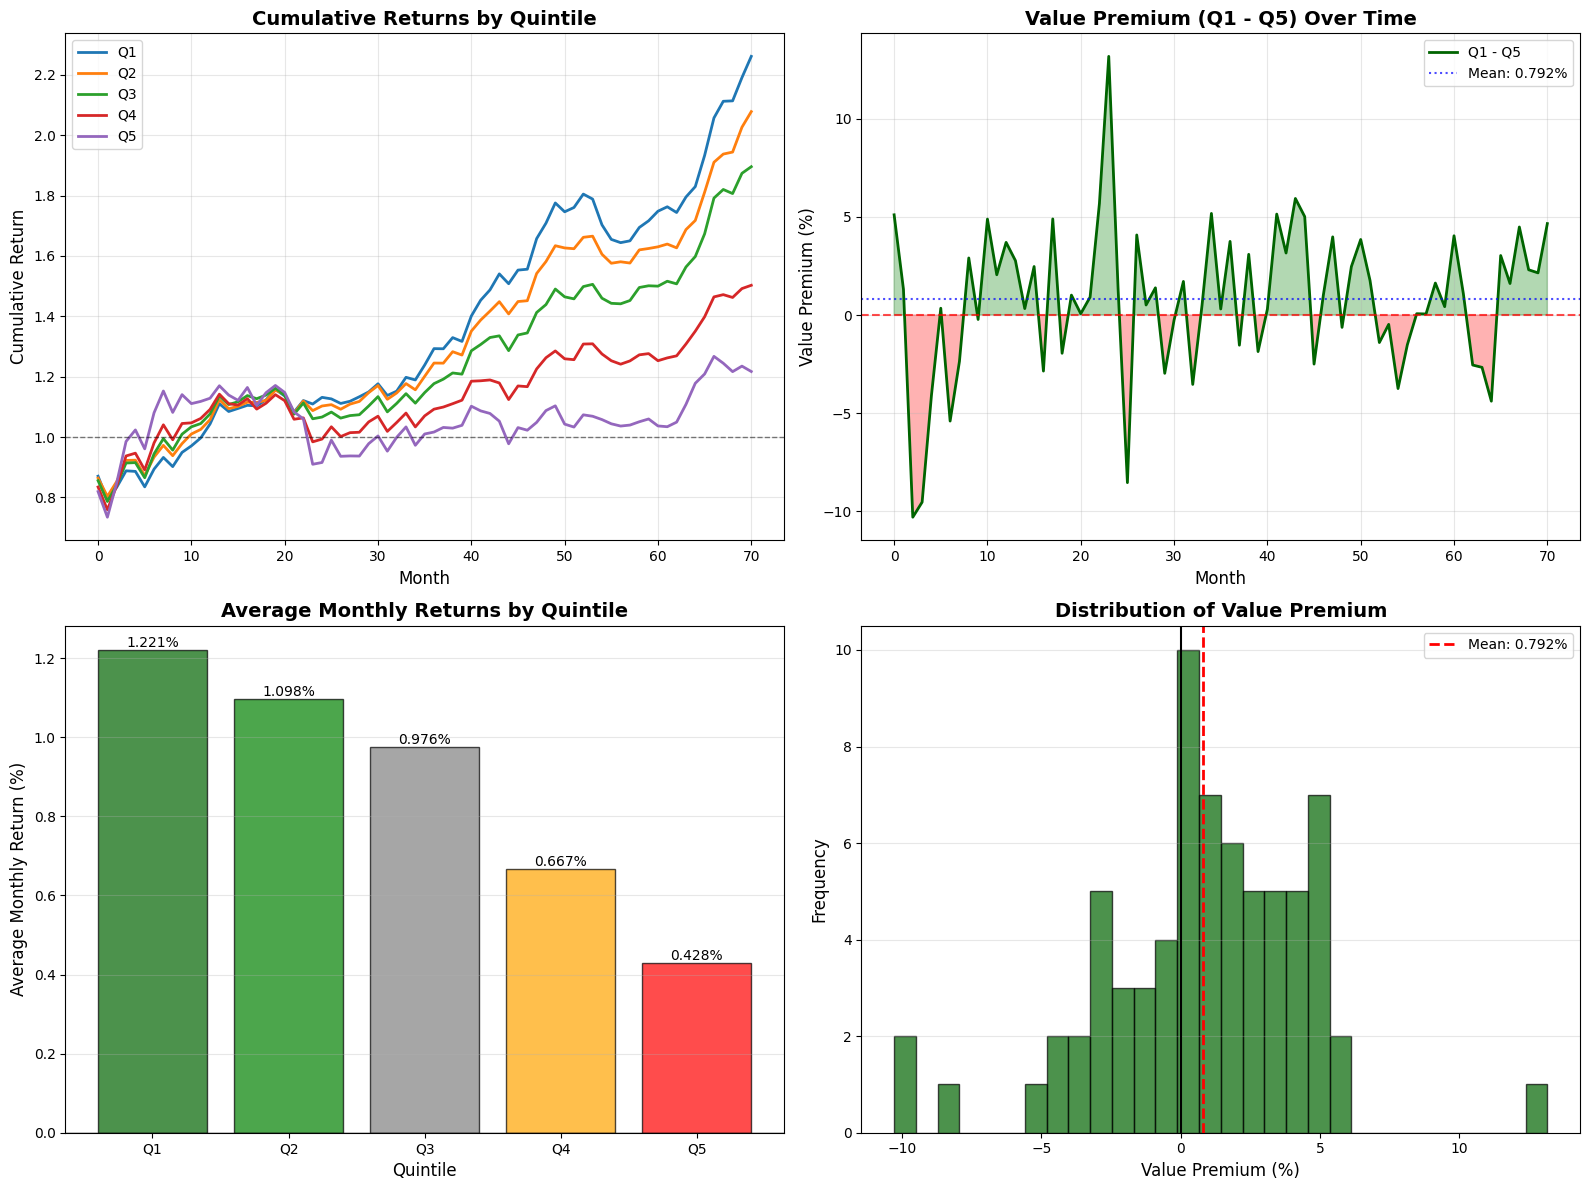


Figure 1: Cumulative Returns by Quintile
Figure 2: Value Premium (Q1 - Q5) Over Time
Figure 3: Average Monthly Returns by Quintile
Figure 4: Distribution of Value Premium


In [12]:
# 可視化：累積リターンの推移
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. 各分位の累積リターン
ax1 = axes[0, 0]
cumulative_returns = (1 + quintile_returns / 100).cumprod()
for col in cumulative_returns.columns:
    ax1.plot(range(len(cumulative_returns)), cumulative_returns[col], label=col, linewidth=2)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Cumulative Return', fontsize=12)
ax1.set_title('Cumulative Returns by Quintile', fontsize=14, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.5)

# 2. バリュープレミアム（Q1 - Q5）の推移
ax2 = axes[0, 1]
ax2.plot(range(len(value_premium)), value_premium, color='darkgreen', linewidth=2, label='Q1 - Q5')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax2.axhline(y=value_premium.mean(), color='blue', linestyle=':', linewidth=1.5, alpha=0.7, label=f'Mean: {value_premium.mean():.3f}%')
ax2.fill_between(range(len(value_premium)), value_premium, 0, where=(value_premium > 0), alpha=0.3, color='green', interpolate=True)
ax2.fill_between(range(len(value_premium)), value_premium, 0, where=(value_premium <= 0), alpha=0.3, color='red', interpolate=True)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Value Premium (%)', fontsize=12)
ax2.set_title('Value Premium (Q1 - Q5) Over Time', fontsize=14, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)

# 3. 各分位の平均リターンの棒グラフ
ax3 = axes[1, 0]
mean_returns = quintile_returns.mean()
colors = ['darkgreen', 'green', 'gray', 'orange', 'red']
bars = ax3.bar(mean_returns.index, mean_returns.values, color=colors, alpha=0.7, edgecolor='black')
ax3.set_xlabel('Quintile', fontsize=12)
ax3.set_ylabel('Average Monthly Return (%)', fontsize=12)
ax3.set_title('Average Monthly Returns by Quintile', fontsize=14, fontweight='bold')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax3.grid(True, alpha=0.3, axis='y')
# 値をバーの上に表示
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=10)

# 4. バリュープレミアムの分布（ヒストグラム）
ax4 = axes[1, 1]
ax4.hist(value_premium.dropna(), bins=30, color='darkgreen', alpha=0.7, edgecolor='black')
ax4.axvline(x=value_premium.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {value_premium.mean():.3f}%')
ax4.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
ax4.set_xlabel('Value Premium (%)', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.set_title('Distribution of Value Premium', fontsize=14, fontweight='bold')
ax4.legend(loc='best')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nFigure 1: Cumulative Returns by Quintile")
print("Figure 2: Value Premium (Q1 - Q5) Over Time")
print("Figure 3: Average Monthly Returns by Quintile")
print("Figure 4: Distribution of Value Premium")

In [ ]:
# 補足分析：単調性のチェック
print("\n" + "=" * 80)
print("補足分析：PBRと期待リターンの単調性")
print("=" * 80)
print("\nPBRが低い（バリュー株）から高い（グロース株）への平均リターンの推移:")
print("-" * 80)

monotonicity_df = pd.DataFrame({
    '分位': quintile_returns.columns,
    '平均リターン (%)': quintile_returns.mean().values,
    '年率リターン (%)': (quintile_returns.mean() * 12).values
})

print(monotonicity_df.to_string(index=False))

# 単調減少しているかチェック
is_monotonic = all(quintile_returns.mean().values[i] >= quintile_returns.mean().values[i+1]
                   for i in range(len(quintile_returns.columns)-1))

print(f"\n単調減少パターン: {'はい' if is_monotonic else 'いいえ'}")
if is_monotonic:
    print("→ PBRが低いほどリターンが高いという関係が確認されました")
else:
    print("→ PBRとリターンの関係は完全な単調減少ではありません")

# 勝率の計算（バリュープレミアムが正だった月の割合）
win_rate = (value_premium > 0).sum() / len(value_premium) * 100
print(f"\nバリュープレミアムの勝率: {win_rate:.2f}%")
print(f"（{len(value_premium)}ヶ月中{(value_premium > 0).sum()}ヶ月でバリュー株がグロース株を上回りました）")


補足分析：PBRと期待リターンの単調性

PBRが低い（バリュー株）から高い（グロース株）への平均リターンの推移:
--------------------------------------------------------------------------------
分位  平均リターン (%)  年率リターン (%)
Q1    1.220780   14.649359
Q2    1.097599   13.171184
Q3    0.976198   11.714372
Q4    0.666960    8.003526
Q5    0.428379    5.140543

単調減少パターン: はい
→ PBRが低いほどリターンが高いという関係が確認されました

バリュープレミアムの勝率: 67.61%
（71ヶ月中48ヶ月でバリュー株がグロース株を上回りました）


In [14]:
# サマリーレポート
print("\n" + "=" * 80)
print("【バリュー効果検証サマリーレポート】")
print("=" * 80)

print(f"\n分析期間: {quintile_returns.index[0]} ～ {quintile_returns.index[-1]}")
print(f"観測月数: {len(quintile_returns)}")
print(f"分析対象企業数: 約{len(df_pbr)}社")

print("\n" + "-" * 80)
print("主要な発見:")
print("-" * 80)

# Q1とQ5の比較
q1_mean = quintile_returns['Q1'].mean()
q5_mean = quintile_returns['Q5'].mean()
vp_mean = value_premium.mean()

print(f"\n1. バリュー株（Q1、低PBR）の平均月次リターン: {q1_mean:.4f}%")
print(f"   年率換算: {q1_mean * 12:.4f}%")

print(f"\n2. グロース株（Q5、高PBR）の平均月次リターン: {q5_mean:.4f}%")
print(f"   年率換算: {q5_mean * 12:.4f}%")

print(f"\n3. バリュープレミアム（Q1 - Q5）: {vp_mean:.4f}%")
print(f"   年率換算: {vp_mean * 12:.4f}%")
print(f"   t値: {vp_t_stat:.4f}")
print(f"   p値: {vp_p_value:.6f}")

print("\n" + "-" * 80)
print("結論:")
print("-" * 80)

if vp_p_value < 0.05 and vp_mean > 0:
    print(f"\n✓ 日本市場においてバリュー効果が統計的に有意に確認されました（p < 0.05）")
    print(f"  低PBR株（バリュー株）は高PBR株（グロース株）よりも月次平均で{vp_mean:.4f}%")
    print(f"  高いリターンを示しており、年率では約{vp_mean * 12:.2f}%のプレミアムが存在します。")
elif vp_mean > 0:
    print(f"\n△ バリュープレミアムは正ですが、統計的有意性は弱いです（p = {vp_p_value:.4f}）")
    print(f"  より長期のデータや頑健性チェックが必要です。")
else:
    print(f"\n✗ 本分析期間において、日本市場でバリュー効果は確認されませんでした")
    print(f"  バリュープレミアムは{vp_mean:.4f}%（p = {vp_p_value:.4f}）")

print("\n" + "=" * 80)


【バリュー効果検証サマリーレポート】

分析期間: 2020/02 ～ 2025/12
観測月数: 71
分析対象企業数: 約3474社

--------------------------------------------------------------------------------
主要な発見:
--------------------------------------------------------------------------------

1. バリュー株（Q1、低PBR）の平均月次リターン: 1.2208%
   年率換算: 14.6494%

2. グロース株（Q5、高PBR）の平均月次リターン: 0.4284%
   年率換算: 5.1405%

3. バリュープレミアム（Q1 - Q5）: 0.7924%
   年率換算: 9.5088%
   t値: 1.7737
   p値: 0.080456

--------------------------------------------------------------------------------
結論:
--------------------------------------------------------------------------------

△ バリュープレミアムは正ですが、統計的有意性は弱いです（p = 0.0805）
  より長期のデータや頑健性チェックが必要です。

